In [47]:
import matplotlib.pyplot as plt
import numpy as np
import copy

In [48]:
class linear_modeal():
    def __init__(self, w, obj_dados):
        self.w = w
        self.obj_dados = obj_dados
    
    def at(self, x, normalize=False):
        if normalize:
            normalized_x = self.obj_dados.normalize_x_at(x)
            
            y_normalized = np.dot(x, w.T)
            
            return self.obj_dados.desnormalize_y_at(y_normalized)
            
        return np.dot(x, w.T)
    

In [49]:
class return_training():
    def __init__(self, w, mse):
        self.w = w
        self.mse = mse
        

In [118]:
class obj_dados():
    def __init__(self, x, y):
        self.x_back_up = copy.deepcopy(x)
        self.y_back_up = copy.deepcopy(y)
        self.x = copy.deepcopy(x)
        self.y = copy.deepcopy(y)
        self.var_x = np.array([x.T[column].std() for column in range(x.shape[1])])
        self.mean_x = np.array([x.T[column].mean() for column in range(x.shape[1])])
        self.var_y = y.std()
        self.mean_y = y.mean()
    
    def normalize(self):
        for column in range(x.shape[1]):
            if self.var_x[column] == 0:
                self.x.T[column] = (self.x.T[column] - self.mean_x[column])
            else:
                self.x.T[column] = (self.x.T[column] - self.mean_x[column])/self.var_x[column]
            
        if self.var_y == 0:
            self.y = (self.y - self.mean_y)
        else:
            self.y = (self.y - self.mean_y)/self.var_y
    
    def normalize_x_at(self, x):
        return_x = (np.array(x)-self.mean_x)
        #print(x)
        #print(self.mean_x)
        #print(self.var_x)
        
        for index, var in enumerate(self.var_x):
            if var != 0:
                return_x[index] /= var 
                
        return return_x
    
    def desnormalize_x_at(self, x):
        return_x = np.array(x)
        
        for index, var in enumerate(self.var_x):
            if var != 0:
                return_x[index] *= var 
                
        return_x += self.mean_x
                
        return return_x
    
    def normalize_y_at(self, y):  
        return_y = np.array(y) - self.mean_y
        
        if self.var_y != 0:
            return_y /= self.var_y
        
        return return_y
    
    def desnormalize_y_at(self, y):
        return_y = np.array(y) 
        
        if self.var_y != 0:
            return_y *= self.var_y

        return_y +=  self.mean_y
        
        return return_y
    

In [119]:
x = np.array([
    [1, 1.087, 18.141],
    [1, 1.613, 42.404],
    [1, 0.953, 16.100],
    [1, 1.003, 13.605],
    [1, 1.156, 23.583],
    [1, 0.978, 7.710],
    [1, 1.092, 17.460],
    [1, 0.572, 3.855],
    [1, 0.940, 14.966],
    [1, 0.597, 4.308],
    [1, 0.838, 9.524],
    [1, 1.473, 35.828]
])

x = np.delete(x, 2, axis=1)

y = np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])

In [120]:
dados = obj_dados(x, y)
dados.normalize()

x = dados.x
y = dados.y


In [121]:
dados.mean_x

array([1.        , 1.02516667])

In [115]:
dados.var_x

array([0.        , 0.29017318])

In [116]:
dados.normalize_x_at([1, 1.087])

array([0.        , 0.21309114])

In [117]:
 dados.desnormalize_x_at(dados.normalize_x_at([1, 1.087]))

array([1.   , 1.087])

In [53]:
def  gradient_descent(x, y, alpha=0.0045, epoch=150):
    N = x.shape[0]
    D = x.shape[1]
    
    new_w = np.array([0]*D)
    w = np.array([0]*D) 
    mse_list = []
    for count1 in range(epoch):
        calcuted_y = np.dot(x, w.T)
        error = np.array(y - calcuted_y)

        w = w + (alpha/N)*(np.dot(error, x))
        
        mse_list.append((error**2).sum())
        
        
    return return_training(w, mse_list)
    

In [54]:
def gradient_descent_stocastic(x, y, alpha=0.5, epoch=2000):
    N = x.shape[0]
    D = x.shape[1]
    
    new_w = np.array([0]*D)
    w = np.array([0]*D) 
    mse_list = []
    count = 0
    for count1 in range(epoch):
        calcuted_y = np.dot(x, w.T)
        error = np.array(y - calcuted_y)

        w = w + (alpha/N)*(np.dot(error[count], x[count]))
        
        mse_list.append((error**2).sum())
        
        count += 1
        
        if count >= N:
            count = 0
        
    return return_training(w, mse_list)

In [55]:
def metodo_analitico(x, y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    error = [y[count] - np.dot(x[count], w.T) for count in range(x.shape[0])]
    error = np.array(error)
    error = [(error**2).sum(), (error**2).sum()]
    return return_training(w, error)

In [56]:
obj = gradient_descent(x, y, alpha=0.045, epoch=400)
w = obj.w

In [57]:
rg = linear_modeal(w, dados)
rg.at([1, 1.087], normalize = True)


290.77476297640806

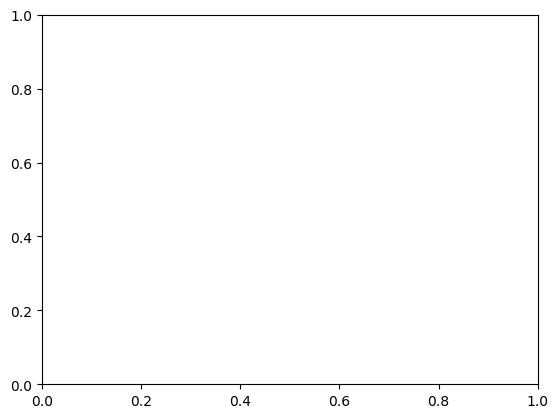

<class 'ValueError'>: x and y must be the same size

In [128]:

x_values = [dados.desnormalize_x_at(x_element) for x_element in x]
y_values = [rg.at(element, normalize=True) for element in x]

y_real = [dados.desnormalize_y_at(element) for element in y]

plt.scatter(x_values, y_real, color='blue', label='Pontos')

plt.plot(x_values, y_values, color='red', label='Reta AB')

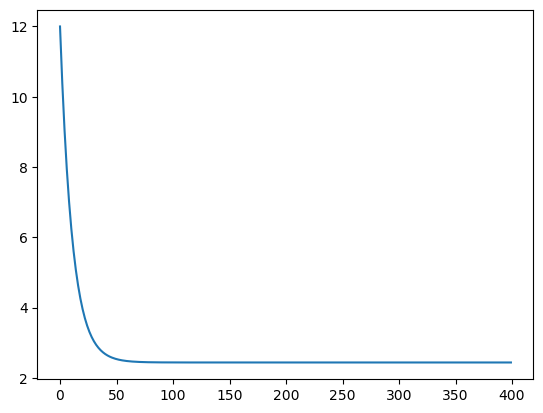

In [127]:
plt.plot(obj.mse)

In [122]:
x[0]

array([0.        , 0.21309114])

In [123]:
dados.desnormalize_x_at(x[0])

array([1.   , 1.087])